In [311]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [589]:
df=pd.read_csv(r'C:\Users\ADMIN\Downloads\Python by Ashish- 11th Aug 2023\Datasets\titanic.csv')

In [590]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [591]:
df1=pd.read_csv(r'C:\Users\ADMIN\Downloads\Python by Ashish- 11th Aug 2023\Datasets\titanic.csv')

In [592]:
df.shape

(891, 12)

In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [594]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [317]:
#cheking the skewness of the columns by which we can decide weather we should fill the values with mean or median
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [595]:
# filling the null values in age column, since prominently its not much skewed can be filled by mean values
df['Age']=df.Age.fillna(df.Age.mean())


In [525]:
df.Age.isnull().sum()

0

In [320]:
df.duplicated().sum()

0

In [596]:
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)

In [597]:
# we can drop the columns which are not usefull
df.drop(columns=['Cabin','Ticket','Name'],axis=1,inplace=True)

In [598]:
df.drop(columns=['PassengerId'],axis=1,inplace=True)

In [363]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [599]:
df=df = df.astype({'Sex':'category','Survived': 'category', 'Pclass': 'category','SibSp': 'int16','Parch': 'int16'})

In [600]:
print(df.memory_usage(deep=True))

Index         132
Survived     1015
Pclass       1023
Sex          1123
Age          7128
SibSp        1782
Parch        1782
Fare         7128
Embarked    51678
dtype: int64


In [537]:
df['Fare']=df['Fare'].astype(np.float16)

In [538]:
df.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.187500
std,13.002015,1.102743,0.806057,inf
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910156
50%,29.699118,0.000000,0.000000,14.453125
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.500000


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int16   
 5   Parch     891 non-null    int16   
 6   Fare      891 non-null    float16 
 7   Embarked  891 non-null    object  
dtypes: category(3), float16(1), float64(1), int16(2), object(1)
memory usage: 22.3+ KB


In [330]:
df.corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.232625,-0.179191,0.091555
SibSp,-0.232625,1.000000,0.414838,0.159654
Parch,-0.179191,0.414838,1.000000,0.216222
Fare,0.091555,0.159654,0.216222,1.000000


<Axes: >

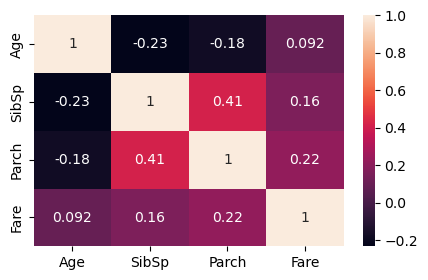

In [331]:
plt.figure(figsize=(5, 3))
sns.heatmap(df.corr(),annot=True)

In [367]:
#Univariate analysis
#first start with the categorical column
# no of people survived
per_of_People_Dead=df.Survived.value_counts()[0]/891*100
print(per_of_People_Dead)

61.61616161616161


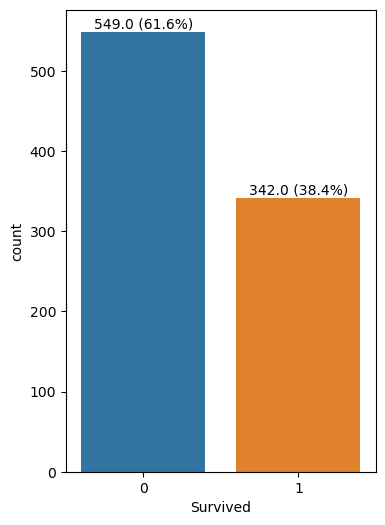

In [255]:
plt.figure(figsize=(4, 6))
a = sns.countplot(x='Survived', data=df)

# Total number of entries for percentage calculation
total_count = len(df)

# Adding labels to the bars
for bar in a.patches:  # Loop through each bar directly using patches
    height = bar.get_height()  # Get the height of the bar
    percentage = (height / total_count) * 100  # Calculate the percentage
    # Place the label above each bar
    a.text(bar.get_x() + bar.get_width() / 2, 
            height, 
            f'{height} ({percentage:.1f}%)', 
            ha='center', 
            va='bottom')
       
# Show the plot
plt.show()

0    68.2%
1    23.5%
2     3.1%
4     2.0%
3     1.8%
8     0.8%
5     0.6%
Name: SibSp, dtype: object


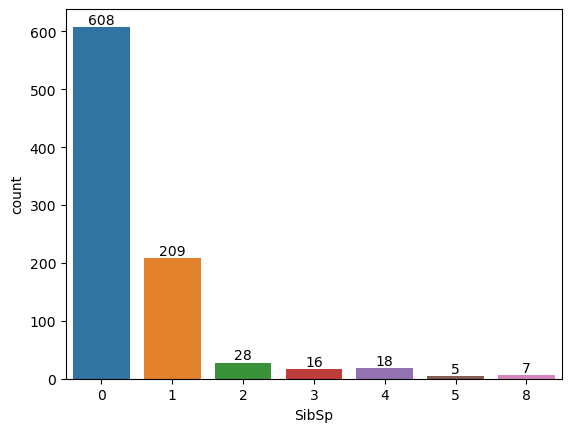

In [333]:
#Percent of people traveling with either sibling  or spouse
a=df.SibSp.value_counts()/891*100
formatted_percent=a.apply(lambda x:f'{x:.1f}%')
print(formatted_percent)
b=sns.countplot(x=df.SibSp)
for i in b.containers:
    b.bar_label(i)

0    76.1%
1    13.2%
2     9.0%
5     0.6%
3     0.6%
4     0.5%
6     0.1%
Name: Parch, dtype: object


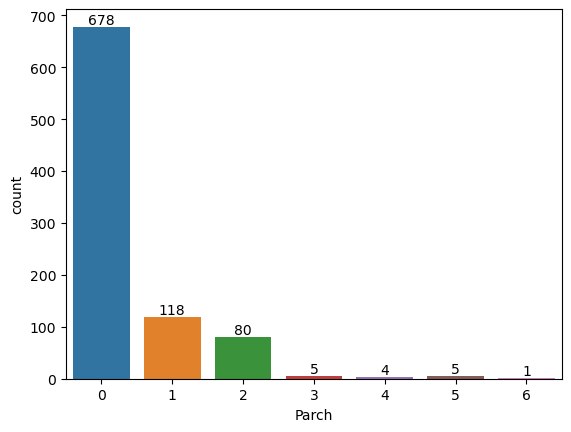

In [108]:
# Percent of people traveling with either parent or Child
a=round(df.Parch.value_counts()/891*100,2)
formatted_percent=a.apply(lambda x:f'{x:.1f}%')
print(formatted_percent)
b=sns.countplot(x=df.Parch)
for i in b.containers:
    b.bar_label(i)

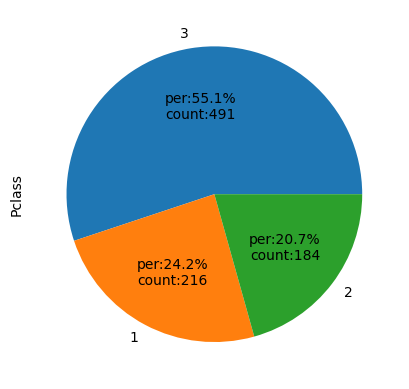

In [334]:
#percentage and count of people travelling in each class
s=df.Pclass.value_counts().plot(kind='pie',autopct=lambda p:f'per:{p:.1f}%\ncount:{p*df.Pclass.size/100:.0f}')


In [335]:

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250000,S
1,1,1,female,38.0,1,0,71.312500,C
2,1,3,female,26.0,0,0,7.925781,S
3,1,1,female,35.0,1,0,53.093750,S
4,0,3,male,35.0,0,0,8.046875,S


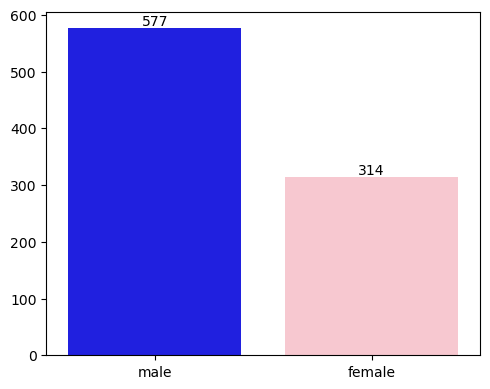

In [260]:
a=df.Sex.value_counts()
plt.figure(figsize=(5, 4))
ax=sns.barplot(x=a.index, y=a.values, order=['male','female'],palette=['blue','pink'],)
for i in ax.containers:
    ax.bar_label(i)
plt.tight_layout()    
  

29.69911764705882
0.4344880940129925
0.9662793026645233


<Axes: xlabel='Age', ylabel='Density'>

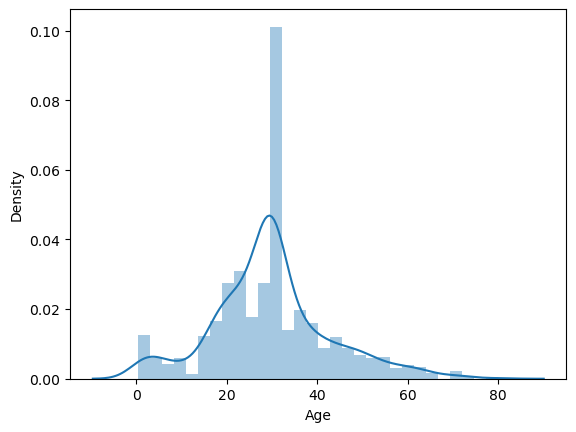

In [337]:
# average age of the people on the ship
print(df.Age.mean())
print(df.Age.skew())
print(df.Age.kurt())
sns.distplot(df.Age)


In [338]:
# since the skewness is around .5 so we can consider it as normal distribution
# means the most people age between 20-40
print("No of people between the age 0 and 1:" ,df[(df.Age>=0)&(df.Age<1)].shape[0])
print("No of people between the age 20 and 40:" ,df[(df.Age>=20)&(df.Age<=40)].shape[0])
print("No of people between the age 40 and 60:" ,df[(df.Age>40)&(df.Age<=60)].shape[0])
print("No of people between the age 60 and 70:" ,df[(df.Age>60)&(df.Age<70)].shape[0])
print("No of people between the age 70 and 75:" ,df[(df.Age>=70)&(df.Age<=75)].shape[0])
print("No of people between the age 75 and 80:" ,df[(df.Age>75)&(df.Age<=80)].shape[0])


No of people between the age 0 and 1: 7
No of people between the age 20 and 40: 577
No of people between the age 40 and 60: 128
No of people between the age 60 and 70: 15
No of people between the age 70 and 75: 6
No of people between the age 75 and 80: 1


32.2
nan
nan


<Axes: xlabel='Fare', ylabel='Density'>

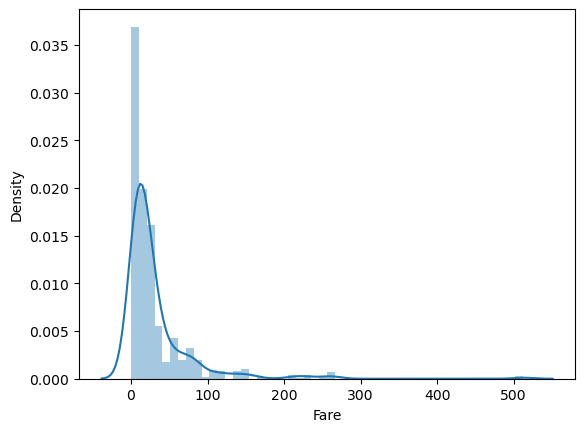

In [339]:
# univariate analysis for the Fare column
print(df.Fare.mean())
print(df.Fare.skew())
print(df.Fare.kurt())
sns.distplot(df.Fare)

In [340]:
df.Fare.describe()

count    891.000000
mean      32.187500
std             inf
min        0.000000
25%        7.910156
50%       14.453125
75%       31.000000
max      512.500000
Name: Fare, dtype: float64

In [ ]:
# skew and kurt for fare is Nan it may be because there is lot of outliers
# we will check for the outliers 

S    646
C    168
Q     77
Name: Embarked, dtype: int64


<Axes: ylabel='Embarked'>

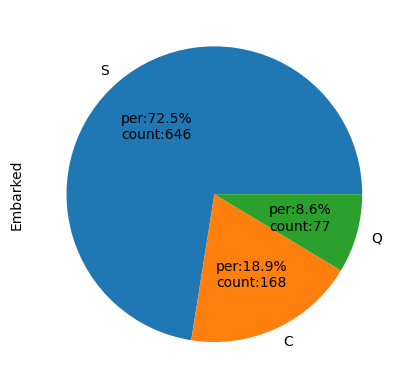

In [458]:
#There were three stations from where the people boarded, we will find the the no.of people embarked from each station
print(df.Embarked.value_counts())
df.Embarked.value_counts().plot(kind='pie',autopct=lambda x:f'per:{x:.1f}%\ncount:{x*891/100:.0f}')

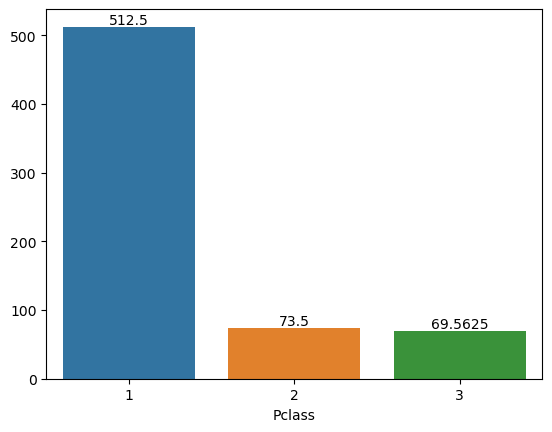

In [436]:
#Maximum Fare in each pclass
grouped=df.groupby('Pclass')['Fare'].max()
grouped
a=sns.barplot(x=grouped.index,y=grouped.values)
for i in a.containers:
    a.bar_label(i)

In [344]:
#Minimum fare in each class
grouped=df.groupby('Pclass')['Fare'].min()
grouped

Pclass
1    0.0
2    0.0
3    0.0
Name: Fare, dtype: float16

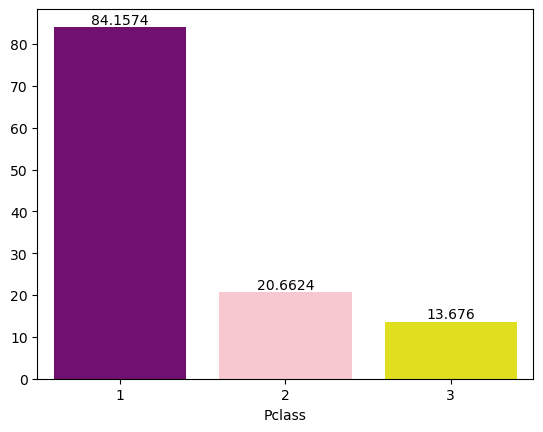

In [462]:
# Average fare in each Pclass
grouped=df.groupby('Pclass')['Fare'].mean()
grouped
a=sns.barplot(x=grouped.index,y=grouped.values,palette=['purple','pink','yellow'])
for i in a.containers:
    a.bar_label(i)

<Figure size 1800x2000 with 0 Axes>

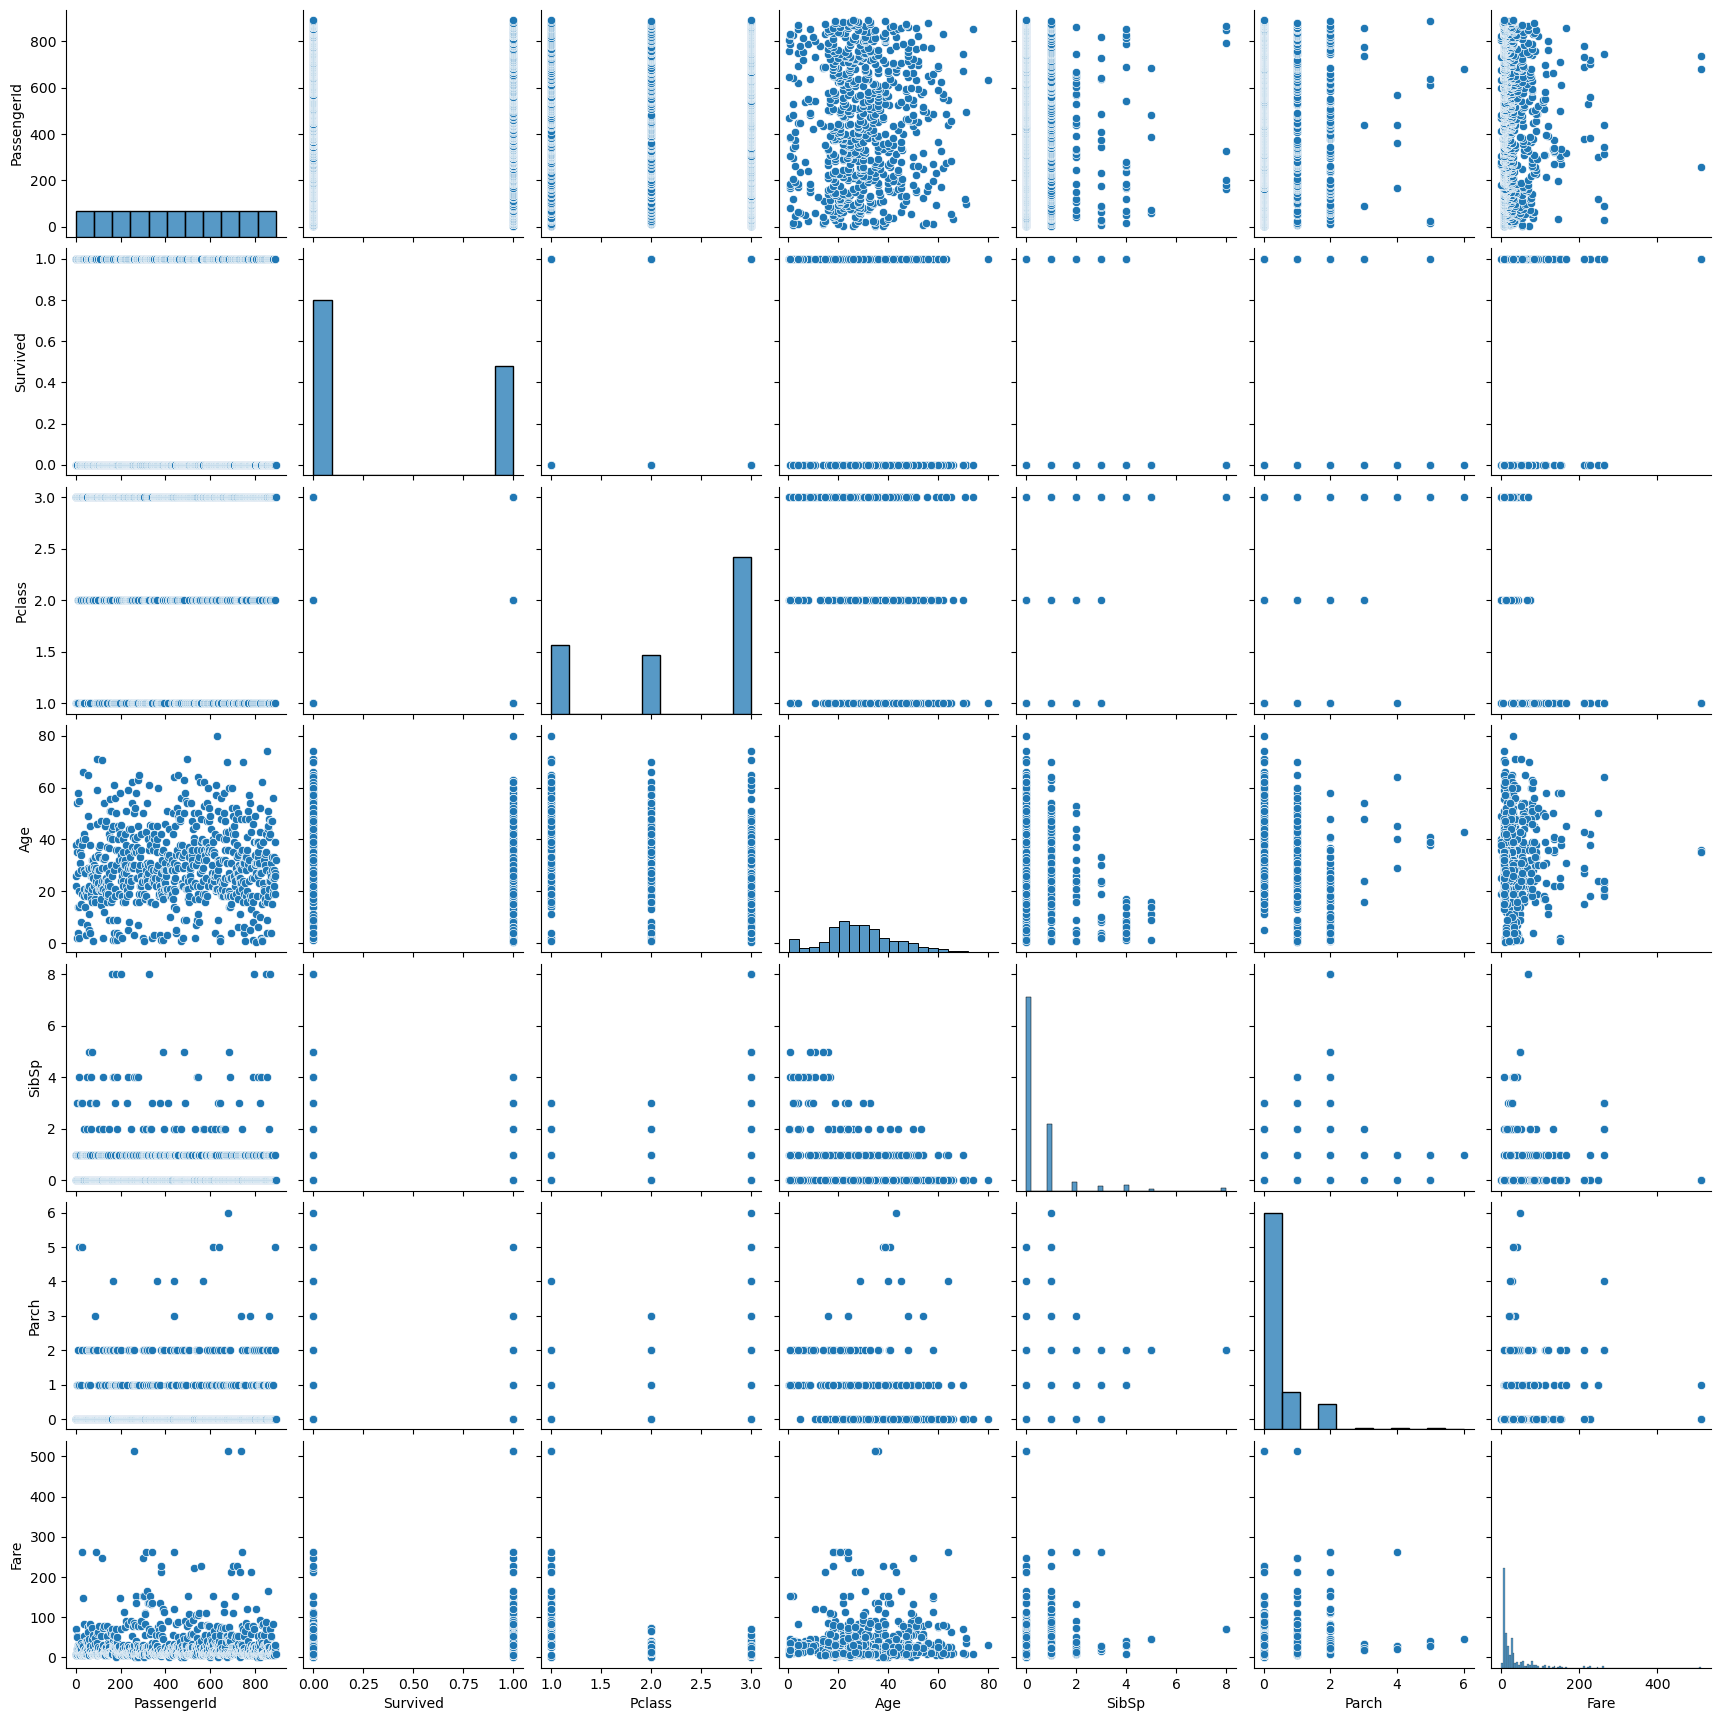

<Figure size 640x480 with 0 Axes>

In [576]:
plt.figure(figsize=(18,20))
sns.pairplot(df1)
plt.show()
plt.tight_layout()
plt.show()

In [438]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Familysize
0,0,3,male,22.0,7.250000,S,Small
1,1,1,female,38.0,71.312500,C,Small
2,1,3,female,26.0,7.925781,S,Alone
3,1,1,female,35.0,53.093750,S,Small
4,0,3,male,35.0,8.046875,S,Alone


In [419]:
#Bivariate analysis for the the columns 
#1. how many males and females were survived 
crosstab=pd.crosstab(df.Sex,df.Survived)
crosstab

Survived,0,1
Sex,,
female,81,233
male,468,109


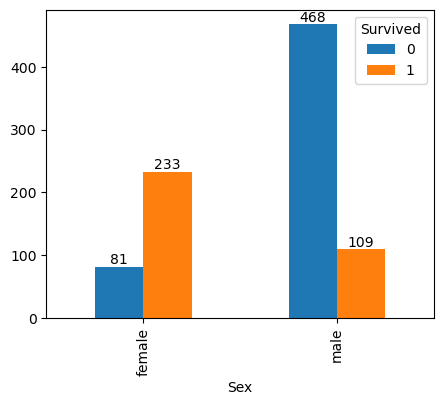

In [420]:
b=crosstab.plot(kind='bar',figsize=(5, 4))
for i in b.containers:
    b.bar_label(i)
# or we can do this in two more ways
#survival_counts = df.groupby(['Sex', 'Survived']).size().reset_index(name='Count')
#sns.barplot(x='Sex', y='Count', hue='Survived', data=survival_counts)
#or sns.countplot(x='Sex', hue='Survived', data=df)

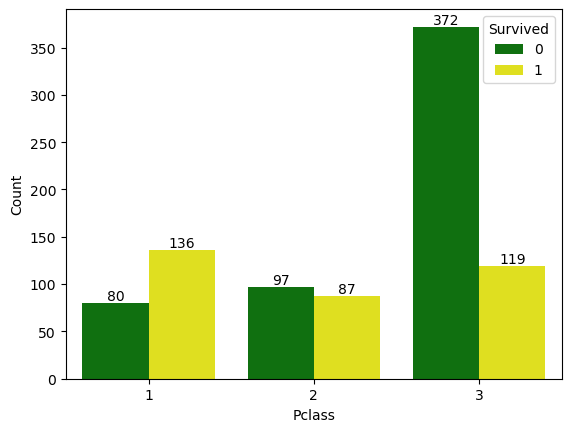

In [463]:
# how many people survived and died in each pclass
a=df.groupby(['Pclass','Survived']).size().reset_index(name='Count')
b=sns.barplot(x=a.Pclass,y=a.Count,hue=a.Survived, palette=['green','yellow'])
for i in b.containers:
    b.bar_label(i)

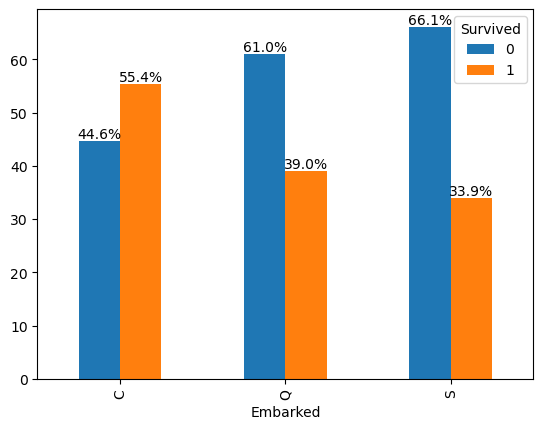

In [553]:
# how many people survived on the basis of embarkment
crosstab=pd.crosstab(df.Embarked,df.Survived).apply(lambda r: round(r/r.sum()*100,1),axis=1)
a=crosstab.plot(kind='bar')
for i in a.containers:
    a.bar_label(i,fmt='%.1f%%')

In [346]:
# people travelling free in each class 
With0Fare= df[df.Fare==0]
WithoutFareINEachClass=With0Fare.groupby('Pclass').size()
WithoutFareINEachClass

Pclass
1    5
2    6
3    4
dtype: int64

In [285]:
# conclusion: there were 15 people who were travelling free and and all of them were alone. 

In [ ]:
# how many people survived with age 

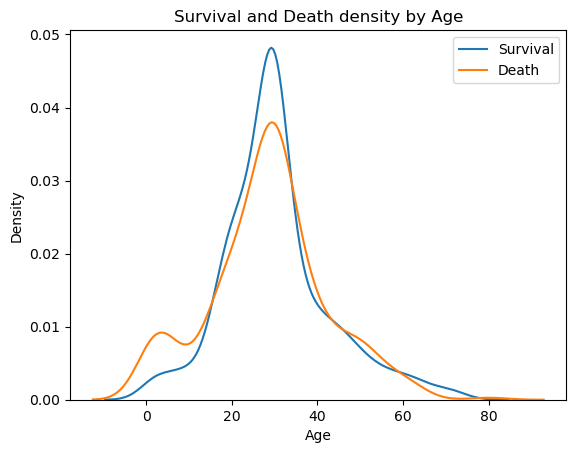

In [569]:
sns.distplot(df.loc[df.Survived==0,['Age']],hist=False)
sns.distplot(df.loc[df.Survived==1,['Age']], hist=False)
plt.title('Survival and Death density by Age')
plt.xlabel('Age')
plt.legend( labels=['Survival','Death'], loc='upper right')


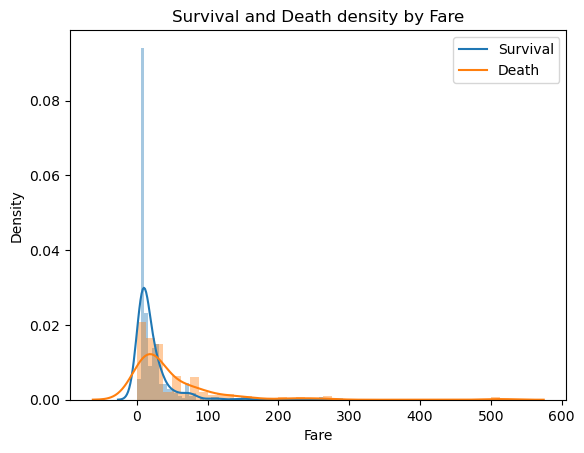

In [571]:
sns.distplot(df.loc[df.Survived==0,['Fare']])
sns.distplot(df.loc[df.Survived==1,['Fare']])
plt.title('Survival and Death density by Fare')
plt.xlabel('Fare')
plt.legend( labels=['Survival','Death'], loc='upper right')


In [601]:
#Feature Engineering for the column 
#Creating one column for sibsp and parch by adding them
df['Familysize'] = df['SibSp'] + df['Parch']

In [602]:
df['Familysize'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int16)

In [603]:
#Creating  a Function to modify the Familysize column
def family_size(col):
    if col == 0:
        return 'Alone'
    elif col > 0 and col <= 3:
        return 'Small'
    elif col > 3 and col <= 6:
        return 'Medium'
    else:   
        return 'Large'
    

In [604]:
#Applying the function to each value of the column Familysize
df['Familysize']=df['Familysize'].apply(family_size)

In [605]:
# we can now drop Sibsp and Parch
df.drop(columns=["SibSp","Parch"], axis=1, inplace=True)

In [544]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Familysize
0,0,3,male,22.0,7.250000,S,Small
1,1,1,female,38.0,71.312500,C,Small
2,1,3,female,26.0,7.925781,S,Alone
3,1,1,female,35.0,53.093750,S,Small
4,0,3,male,35.0,8.046875,S,Alone


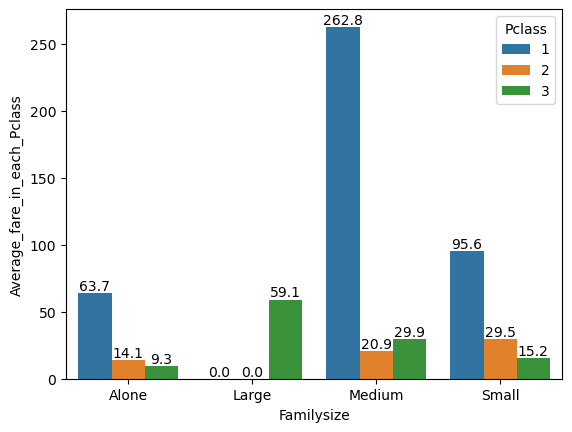

In [557]:
# multivariate analysis
#Average fare  according to familysize in each class
new=df.groupby(['Pclass','Familysize']).Fare.mean().reset_index(name='Average_fare_in_each_Pclass')
new.Average_fare_in_each_Pclass.fillna(0, inplace=True)
a=sns.barplot(x='Familysize',y='Average_fare_in_each_Pclass',data=new, hue='Pclass')

for i in a.containers:
    a.bar_label(i, fmt='%.1f')
plt.show()

In [582]:
#Percent of people survived by familysize
crosstab=pd.crosstab(df["Survived"],df["Familysize"]).apply(lambda r:round(r/r.sum()*100,1),axis=1)
crosstab

Familysize,Alone,Large,Medium,Small
Survived,,,,
0,68.1,2.4,7.1,22.4
1,47.7,0.0,2.9,49.4


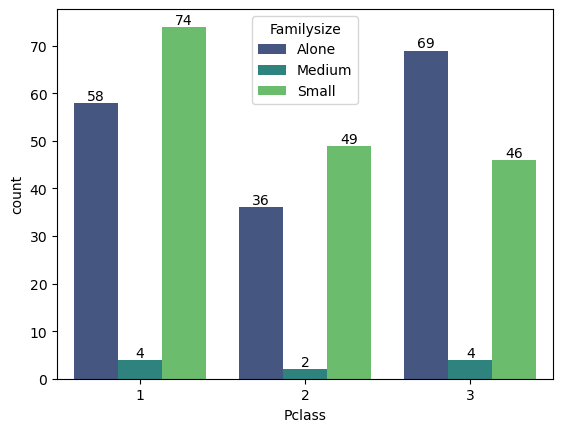

In [482]:
# people survived according to the family size in each class 
survivor_counts = df[df['Survived'] == 1].groupby(['Pclass', 'Familysize']).size().reset_index(name='count')

a=sns.barplot(data=survivor_counts, x='Pclass', y='count', hue='Familysize', palette='viridis' )
for i in a.containers:
    a.bar_label(i)
plt.show()


In [ ]:
# how many people survived above age 65 in each pclass

In [416]:
print("people above age 65:", df[(df.Age>=65)].shape[0])
people_survived=len(df[(df.Age>=65)&(df.Survived==1)])
print("People survived above age 66:", people_survived)

people above age 65: 11
People survived above age 66: 1


In [ ]:
# how many people survived below age 65 in each pclass

In [418]:

print("children below age 5:", df[(df.Age<5)].shape[0])
children_survived=len(df[(df.Age<5)&(df.Survived==1)])
print("Children survived below age 5 :", children_survived)

children below age 5: 40
Children survived below age 5 : 27


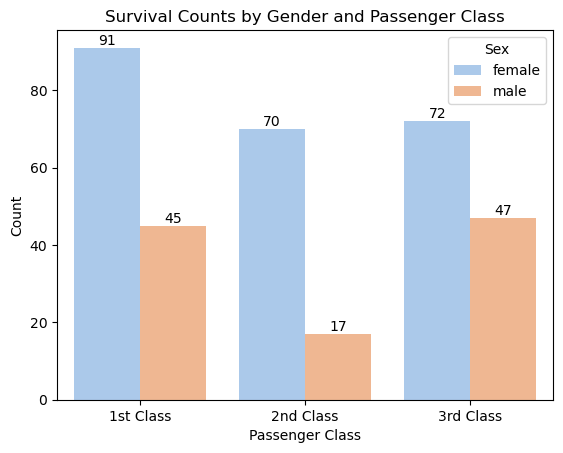

In [503]:
# how many male and females survived in each pclass
survivor_counts = df[df['Survived'] == 1].groupby(['Pclass', 'Sex']).size().reset_index(name='count')

a=sns.barplot(data=survivor_counts, x='Pclass', y='count', hue='Sex', palette='pastel')
for i in a.containers:
    a.bar_label(i)
plt.title('Survival Counts by Gender and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])  
plt.show()

<Axes: xlabel='Age'>

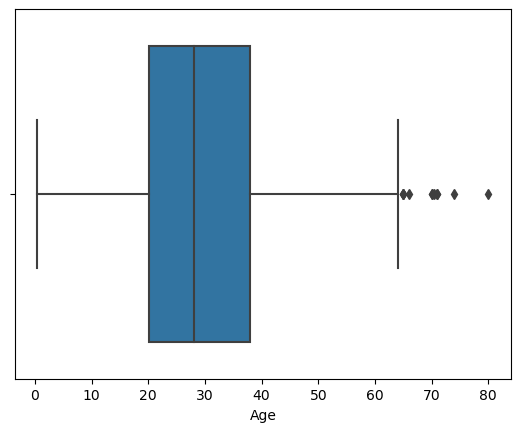

In [635]:
#checking outliers in Age column
sns.boxplot(x=df1.Age)

In [609]:
# Handling outliers
# Age age is numerical column and following normal distribution hence we use the z score rule
df=df[df['Age']<(df['Age'].mean()+3*df['Age'].std())]
df.shape

(884, 7)

In [ ]:
# there were 7 outliers in age column

<Axes: xlabel='Fare'>

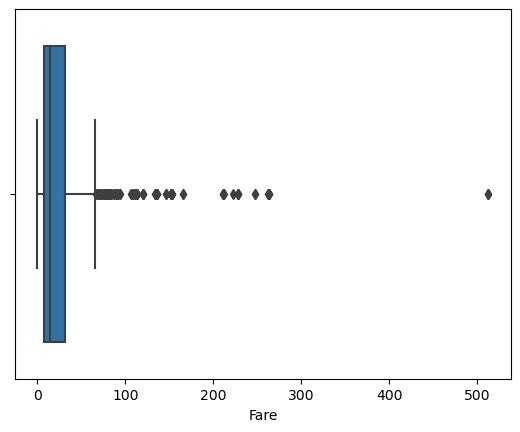

In [634]:
#checking outliers in Age column
sns.boxplot(x=df1.Fare)

In [626]:
# creating a function to remove the outlier 

q3=df['Fare'].quantile(.75)
q1=df['Fare'].quantile(.25)

iqr=q3-q1

upper=q3+1.5*iqr
lower=q1-1.5*iqr
#df2=df[(df.Fare>lower) &(df.Fare<upper)]
#df2.shape[0]
df['Fare']=np.clip(df['Fare'],lower,upper)

In [628]:
# one hot coding
# we will transform the categorical column
df=pd.get_dummies(data=df,columns=['Pclass','Sex','Embarked', 'Familysize'],drop_first=True)


<Axes: >

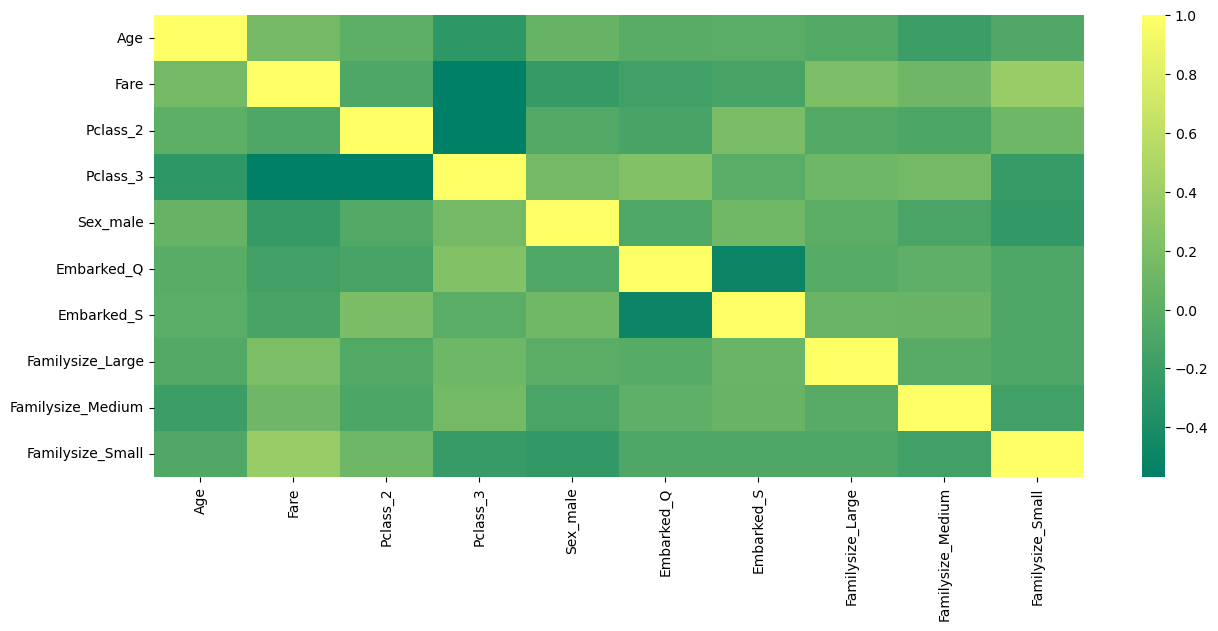

In [629]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap='summer')

# **conclusions:** 
1. Survival chances of the females are higher than the males
2. People above the age of 65 have less chances of survival
3. Kids of age 15 or less have higher chances of survival
4. between the age of 20-40 age of people have the least change to survive
5. People travel in higher class are priotized and have high chances of survival
6. people travelling will small families have higher chances of survival
7. people embarked from C had higher chances of survival
8. people traveling in pclass 3 have the least chances of survival.